# PI7 Onderzoeksrapport
#### Dajmen Graus en Bram Verheijen 

# TODO
## Accuracy score by linear regression (werken met train en test set)
## Opdelen code stukken in kleinere stukken
## Tekst schrijven

## Data Selectie/Preperation

### Imports en inlezen data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.special import expit

df = pd.read_csv('winequality-red.csv')


### Preperatie voor Logistic Regression en Classification

In [2]:
# Low en High quality wine set (0 for low, 1 for high), set in label 'quality_range'
bins = [0, 5, 10]

labels = [0, 1]

df_bins = df.copy()

df_bins['quality_range'] = pd.cut(x=df_bins['quality'], bins=bins, labels=labels)


## Uitwerkingen

### Multiple Linear Regression

In [23]:
#Multiple Linear Regression
y_lin = df['quality']
X_lin = df.drop('quality',axis=1)

X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.1, random_state=40)

#Sklearn solution
model_lin = LinearRegression()

model_lin.fit(X_lin_train, y_lin_train)

predictions = model_lin.predict(X_lin_test)

print("Intercept: \n", model_lin.intercept_)
print("Coefficients: \n", model_lin.coef_)


Intercept: 
 15.335718506836685
Coefficients: 
 [ 2.54597245e-02 -1.07706341e+00 -2.02785449e-01  1.38509688e-02
 -1.73613411e+00  3.62196555e-03 -2.99237597e-03 -1.12547406e+01
 -4.15741388e-01  8.43417688e-01  2.82638815e-01]


In [22]:
#SM (statsmodel.api) solution
X_lin_train = sm.add_constant(X_lin_train)

model_sm = sm.OLS(y_lin_train, X_lin_train).fit()
predictions_sm = model_sm.predict(X_lin_train)

print_model = model_sm.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     70.08
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.78e-125
Time:                        21:43:12   Log-Likelihood:                -1421.5
No. Observations:                1439   AIC:                             2867.
Df Residuals:                    1427   BIC:                             2930.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3357 

In [9]:
#Accuracy Testing
train_accuracy = model_lin.score(X_lin_train, y_lin_train)
test_accuracy = model_lin.score(X_lin_test, y_lin_test)

y_lin_prediction = model_lin.predict(X_lin_test)

lin_score = r2_score(y_lin_test, y_lin_prediction)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

print("\n")

print('R2 and Mean errors', '-'*35, 
      'R2-score   : {:.2f}'.format(lin_score), 
      'Mean Squared Error   : {:.2f}'.format(mean_squared_error(y_lin_test,y_lin_prediction)),
      'Root Mean Squared Error   : {:.2f}'.format(np.sqrt(mean_squared_error(y_lin_test,y_lin_prediction))), sep='\n')


One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.35
Accuracy in Test  Group   : 0.44


R2 and Mean errors
-----------------------------------
R2-score   : 0.44
Mean Squared Error   : 0.37
Root Mean Squared Error   : 0.61


### Logistic Regression

In [12]:

#Set X and y, also split into train and test sets
X_log = df_bins[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y_log = df_bins['quality_range']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.1, random_state=40)

In [13]:
#Logistic regression
model_lr = LogisticRegression(random_state=40, max_iter=1600)

model_lr.fit(X_log_train, y_log_train)

train_accuracy = model_lr.score(X_log_train, y_log_train)
test_accuracy = model_lr.score(X_log_test, y_log_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')


One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.74
Accuracy in Test  Group   : 0.79


[0.00074751 0.0004302  0.00068596 0.00105407 0.00052359 0.00055674
 0.00088767 0.00084514 0.0005993  0.00087684 0.00040958 0.00059199
 0.00048047 0.00059199 0.00053661 0.00066115 0.0005172  0.00077555
 0.00053006 0.0005172  0.00054324 0.00057763 0.00057058 0.00067759
 0.00068596 0.00059199 0.00048047 0.00055674 0.00046309 0.00073839
 0.00062179 0.00054324 0.00056362 0.00066932 0.00050465 0.0004985
 0.00044089 0.00064512 0.00058477 0.00088767 0.00084514 0.00049241
 0.00079483 0.00044634 0.00072938 0.00055674 0.00054324 0.00075674
 0.0005172  0.00059199 0.00084514 0.00066932 0.00050465 0.00145016
 0.00056362 0.00058477 0.00082464 0.0005172  0.00046309 0.00069443
 0.00059199 0.00057058 0.00057058 0.00062179 0.0004746  0.00097925
 0.00055674 0.00077555 0.00053661 0.00059199 0.00066115 0.00059199
 0.00049241 0.00044634 0.00100358 0.00051089 0.00056362 0.00052359
 0.00093233 0.00078513 0.0004746  0.00054995 0.00094385 0.00076609
 0.00054324 0.00079483 0.00093233 0.00058477 0.00045186 0.00063

(2.0, 18.0)

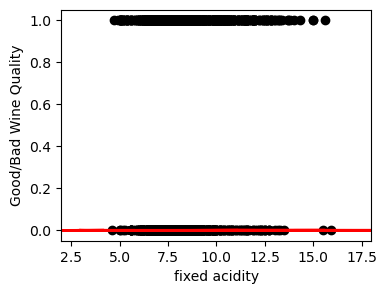

In [48]:
#Plot Logistic Regression
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X_log_train['fixed acidity'], y_log_train, label="test data", color='black')

log_coef = model_lr.coef_

log_coef = log_coef.reshape(11,1)

loss = expit(X_log_test['fixed acidity'] * log_coef[0] + model_lr.intercept_).ravel()
plt.plot(X_log_test, loss, label="Logistic Regression model fixed acidity", color="red")
print(loss)

plt.ylabel("Good/Bad Wine Quality")
plt.xlabel("fixed acidity")
plt.xlim(2,18)


In [ ]:

log_predictions = model_lr.predict(X_log_test)

#confusion matrix
score = round(accuracy_score(y_log_test, log_predictions), 3)
confusionMatrix_test = cm(y_log_test, log_predictions)
sns.heatmap(confusionMatrix_test, annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

#Array confusion matrix
log_pred_test = model_lr.predict(X_log_test)
log_pred_train = model_lr.predict(X_log_train)

cm = cm(y_log_test, log_pred_test)
print(cm)

In [ ]:
#ROC-curve

probs = model_lr.predict_proba(X_log_test)[:,1] #predifct probabilities for the test data

fpr, tpr, thresholds =  roc_curve(y_log_test, probs) #Get ROC Curve

plt.figure(figsize=(8,5))
#Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity Score')
plt.ylabel('Recall Score')
plt.title('ROC-Curve')
plt.show()


## Conclusie